In [178]:
import tensorflow as tf
import zipfile


In [179]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-01-26 12:57:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 142.250.152.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   237MB/s    in 0.4s    

2022-01-26 12:57:37 (237 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [180]:
import os

print('Pizza train images:',len(os.listdir('pizza_steak/train/pizza')))
print('Steak train images:',len(os.listdir('pizza_steak/train/steak')))
print()
print('Pizza test images:',len(os.listdir('pizza_steak/test/pizza')))
print('Steak test images:',len(os.listdir('pizza_steak/test/steak')))


Pizza train images: 750
Steak train images: 750

Pizza test images: 250
Steak test images: 250


In [181]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt


In [182]:
def print_random_image(directory_path,
                       target_class,
                       no_of_images=4,
                       ):
  
  x = random.sample(os.listdir(directory_path+'/'+target_class),no_of_images)
  
  #Create plotting grid
  fig, axes = plt.subplots(1,no_of_images, sharex=True, sharey=False)
  fig.set_figheight(10)
  fig.set_figwidth(int(15+no_of_images*2))
  
  #plot selected images and their shapes
  for i in range(no_of_images):
    img = directory_path+'/'+target_class+'/'+x[i]
    
    axes[i].imshow(Image.open(img))
    axes[i].axis('off')
    axes[i].set_title(f'{target_class}  Img shape:{plt.imread(img).shape}')
    

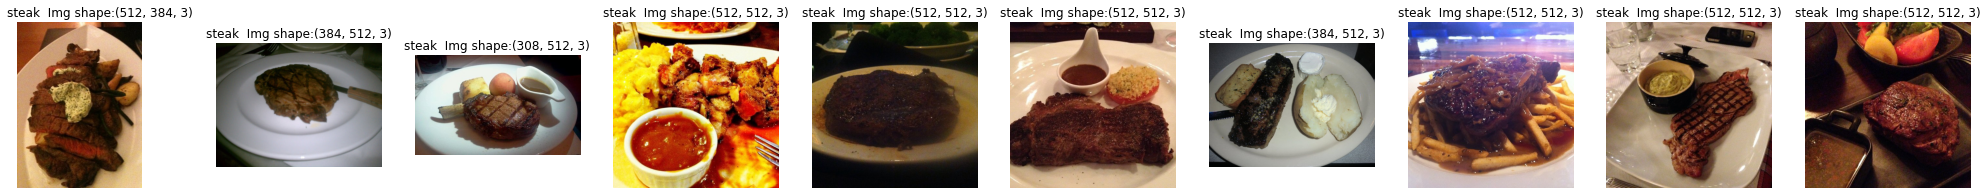

In [206]:
print_random_image('pizza_steak/train',target_class='steak',no_of_images=10)

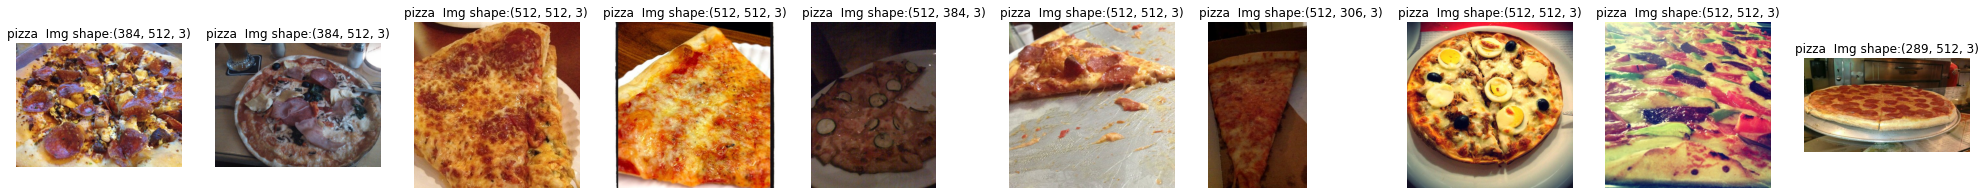

In [261]:
print_random_image('pizza_steak/train',target_class='pizza',no_of_images=10)

In [189]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [221]:
image_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [248]:
train_loader = image_generator.flow_from_directory('pizza_steak/train',
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   subset='training')

validation_loader = image_generator.flow_from_directory('pizza_steak/train',
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   subset='validation')

test_loader = image_generator.flow_from_directory('pizza_steak/test',
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   )

builder_input_shape=next(train_loader)[0].shape
cnn_input_shape=builder_input_shape[1:]
print('Input shape:',cnn_input_shape)

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Input shape: (224, 224, 3)


In [258]:
model = tf.keras.models.Sequential()

'-------------------------------------------------------------------'
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation='relu',
                                 input_shape=(224,224,3)))

model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation='relu',))

model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding='valid'))

'-------------------------------------------------------------------'

model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation='relu',))

model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation='relu',))

model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding='valid'))

'-------------------------------------------------------------------'

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

model.build(builder_input_shape)

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_62 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_64 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [259]:
steps_train = len(train_loader)
validation_steps = len(validation_loader)
test_steps = len(test_loader)


model.fit(train_loader,
          steps_per_epoch = steps_train,
          epochs = 10,
          validation_data=validation_loader,
          validation_steps=validation_steps)

Epoch 1/10
38/38 [==============================] - 12s 245ms/step - loss: 0.5575 - accuracy: 0.7175 - val_loss: 0.5097 - val_accuracy: 0.7833
Epoch 2/10
38/38 [==============================] - 8s 220ms/step - loss: 0.4212 - accuracy: 0.8150 - val_loss: 0.4753 - val_accuracy: 0.7933
Epoch 3/10
38/38 [==============================] - 8s 220ms/step - loss: 0.3787 - accuracy: 0.8292 - val_loss: 0.4677 - val_accuracy: 0.8067
Epoch 4/10
38/38 [==============================] - 8s 219ms/step - loss: 0.3449 - accuracy: 0.8492 - val_loss: 0.4816 - val_accuracy: 0.7900
Epoch 5/10
38/38 [==============================] - 8s 219ms/step - loss: 0.3299 - accuracy: 0.8558 - val_loss: 0.4891 - val_accuracy: 0.7967
Epoch 6/10
38/38 [==============================] - 8s 220ms/step - loss: 0.2940 - accuracy: 0.8908 - val_loss: 0.5028 - val_accuracy: 0.8000
Epoch 7/10
38/38 [==============================] - 9s 232ms/step - loss: 0.2447 - accuracy: 0.9008 - val_loss: 0.5187 - val_accuracy: 0.7933
Epoch

In [260]:
model.evaluate(test_loader)

16/16 [==============================] - 3s 182ms/step - loss: 0.4240 - accuracy: 0.8340


[0.424028605222702, 0.8339999914169312]